Dataset: https://www.kaggle.com/datasets/andrewmvd/car-plate-detection?select=images

In [7]:
#importing libraries

import os
import random
import cv2
import matplotlib.pyplot as plt

In [18]:
# !pip install ultralytics
# !pip install pytesseract Pillow

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/car-plate-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1

annotations  images


In [22]:
# # Get all image file names
# image_folder = os.path.join(path, "images")
# image_files = [f for f in os.listdir(image_folder) if f.endswith(".png")]

# # Load all images into a list
# images = [cv2.cvtColor(cv2.imread(os.path.join(image_folder, img)), cv2.COLOR_BGR2RGB) for img in image_files]

# # Select 3 random images for display
# random_images = random.sample(images, 3)

# # Plot images
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# for ax, img in zip(axes, random_images):
#     ax.imshow(img)
#     ax.axis("off")

# plt.show()

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as xet
import cv2
import shutil

import warnings
warnings.filterwarnings('ignore')

In [10]:
import re

def find_the_number(name_of_file):
    """
    Extracts the first sequence of digits from the given filename string and returns it as an integer.
    If no digits are found, returns 0.

    Parameters:
    filename (str): The input string to search for digits.

    Returns:
    int: The first sequence of digits found in the input string, or 0 if no digits are found.
    """
    match = re.search(r'(\d+)',  name_of_file)
    # If a match is found, return the matched number as an integer
    if match:
        return int(match.group(0))
    # If no match is found, return 0
    else:
        return 0


In [11]:
# Example usage
print(find_the_number("car5333.txt"))  # Output: 5333
print(find_the_number("no_numbers_here"))  # Output: 0

5333
0


In [12]:
# Initialize a dictionary to store labels and image information

labels_dict = dict(
    img_path=[],
    xmin=[],
    xmax=[],
    ymin=[],
    ymax=[],
    img_w=[],
    img_h=[]
)

xml_files= glob(f"{path}/annotations/*.xml")
print(xml_files[:12])

['/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars217.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars336.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars233.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars106.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars420.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars75.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars159.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars129.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars20.xml', '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars147.xml', '

In [13]:
for file_name in sorted(xml_files, key=find_the_number):
    # Parse the XML file
    info = xet.parse(file_name)
    root = info.getroot()
    # Find the 'object' element in the XML and extract bounding box information
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    # Get the image filename and construct the full path to the image
    img_name = root.find('filename').text
    img_path = os.path.join(path, 'images', img_name)

    # Append the extracted information to the respective lists in the dictionary
    labels_dict['img_path'].append(img_path)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

    # Read the image to get its dimensions
    height, width, _ = cv2.imread(img_path).shape
    labels_dict['img_w'].append(width)
    labels_dict['img_h'].append(height)

# Convert the dictionary to a pandas DataFrame
alldata = pd.DataFrame(labels_dict)

# Display the DataFrame
alldata

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/root/.cache/kagglehub/datasets/andrewmvd/car-...,149,223,196,231,400,240
1,/root/.cache/kagglehub/datasets/andrewmvd/car-...,122,265,195,234,400,300
2,/root/.cache/kagglehub/datasets/andrewmvd/car-...,189,259,55,78,400,151
3,/root/.cache/kagglehub/datasets/andrewmvd/car-...,138,177,79,92,400,247
4,/root/.cache/kagglehub/datasets/andrewmvd/car-...,112,160,186,211,400,300
...,...,...,...,...,...,...,...
428,/root/.cache/kagglehub/datasets/andrewmvd/car-...,23,56,190,198,400,225
429,/root/.cache/kagglehub/datasets/andrewmvd/car-...,377,476,405,439,600,450
430,/root/.cache/kagglehub/datasets/andrewmvd/car-...,191,213,185,195,400,267
431,/root/.cache/kagglehub/datasets/andrewmvd/car-...,149,255,130,158,400,300


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Use 10% of the data for the test set
train, test = train_test_split(alldata, test_size=1/10, random_state=42)

# Split the training data further into training and validation sets
# Use 8/9 of the remaining data for the training set, resulting in an 80/10/10 split overall
train, val = train_test_split(train, train_size=8/9, random_state=42)

# Print the number of samples in each set
print(f'''
      len(train) = {len(train)}
      len(val) = {len(val)}
      len(test) = {len(test)}
''')


      len(train) = 345
      len(val) = 44
      len(test) = 44



In [15]:
# Remove the 'datasets' directory if it exists
if os.path.exists('datasets'):
    shutil.rmtree('datasets')

In [16]:
def make_split_folter_in_yolo_formate(split_name, split_df):
    """
    Creates a folder structure for a dataset split (train/val/test) in YOLO format.

    Parameters:
    split_name (str): The name of the split (e.g., 'train', 'val', 'test').
    split_df (pd.DataFrame): The DataFrame containing the data for the split.

    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',
    and save the corresponding labels and images in YOLO format.
    """
    labels_path = os.path.join('datasets', 'car_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'car_license_plate_new', split_name, 'images')

    os.makedirs(labels_path)
    os.makedirs(images_path)

    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))

        # Calculate YOLO format bounding box coordinates
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

        # Save the label in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")

        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))

    print(f"Created '{images_path}' and '{labels_path}'")

In [17]:
# Create YOLO format folders for train, validation, and test splits
make_split_folter_in_yolo_formate("train", train)
make_split_folter_in_yolo_formate("val", val)
make_split_folter_in_yolo_formate("test", test)


Created 'datasets/car_license_plate_new/train/images' and 'datasets/car_license_plate_new/train/labels'
Created 'datasets/car_license_plate_new/val/images' and 'datasets/car_license_plate_new/val/labels'
Created 'datasets/car_license_plate_new/test/images' and 'datasets/car_license_plate_new/test/labels'


In [18]:
# Define the content of the datasets.yaml file
datasets_yaml = '''
path: car_license_plate_new

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yaml file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)

In [19]:
os.getcwd()

'/content'

In [20]:
!ls datasets

car_license_plate_new


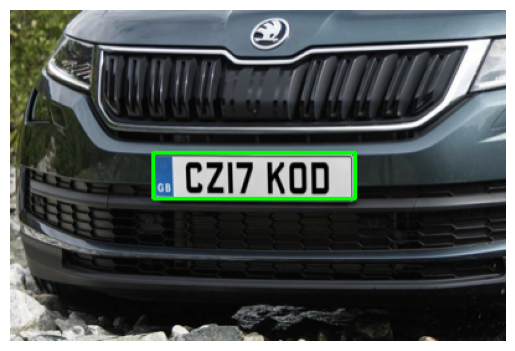

In [21]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory paths
image_dir = 'datasets/car_license_plate_new/train/images'
label_dir = 'datasets/car_license_plate_new/train/labels'

# Get the first image file
image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[10]

# Construct paths for the image and its corresponding label
image_path = os.path.join(image_dir, first_image_file)
label_path = os.path.join(label_dir, os.path.splitext(first_image_file)[0] + '.txt')

# Load the image using OpenCV
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the label file to get bounding box information
with open(label_path, 'r') as f:
    lines = f.readlines()

# Plot the bounding box on the image
for line in lines:
    # Parse the label file line to extract bounding box information
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

    # Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box on the image using a green rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding box using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()  # Display the image

In [19]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [20]:
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 173MB/s]


In [21]:
import time

# Start the timer
start_time = time.time()

model.train(
    data='datasets.yaml',  # Path to the dataset configuration file
    epochs=100,            # Number of training epochs
    batch=16,              # Batch size
    # device='cuda',         # Use GPU for training
    imgsz=320,             # Image size (width and height) for training
    cache=True             # Cache images for faster training
)

# End the timer
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Training completed in {elapsed_time:.2f} seconds")

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=datasets.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 46.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/car_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:01<00:00, 213.28it/s]

train: New cache created: /content/datasets/car_license_plate_new/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:05<00:00, 68.21it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/car_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 154.53it/s]

val: New cache created: /content/datasets/car_license_plate_new/val/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 83.61it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.728G      1.698      3.238      1.328         19        320: 100%|██████████| 22/22 [00:05<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         44         44     0.0039      0.932       0.61      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.675G        1.6      1.779      1.188         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         44         44    0.00392      0.977     0.0282     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.675G      1.649      1.626      1.295         14        320: 100%|██████████| 22/22 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         44         44     0.0255      0.227     0.0985     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.703G      1.571      1.436      1.238         23        320: 100%|██████████| 22/22 [00:03<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all         44         44      0.615      0.159      0.248      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.703G      1.529       1.36      1.233         14        320: 100%|██████████| 22/22 [00:03<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         44         44      0.869      0.604      0.715      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.69G      1.531      1.309      1.241         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         44         44      0.667      0.547      0.548      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.703G      1.477      1.186      1.252         17        320: 100%|██████████| 22/22 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         44         44      0.883      0.683      0.793      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.703G      1.439      1.149      1.211         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         44         44      0.566      0.592      0.656       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.703G      1.412      1.126      1.199         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         44         44      0.738      0.705      0.743      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.703G      1.446      1.097      1.224         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         44         44      0.791      0.687      0.766      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.703G      1.463       1.05      1.215         21        320: 100%|██████████| 22/22 [00:04<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         44         44      0.876      0.801      0.889      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.703G      1.428      1.058      1.231         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all         44         44      0.846      0.875      0.879      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.703G      1.372      1.004       1.15         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         44         44       0.86      0.839      0.876      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.703G      1.357     0.9689      1.176         21        320: 100%|██████████| 22/22 [00:04<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         44         44      0.857      0.819      0.886      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.703G      1.342     0.9545      1.161         13        320: 100%|██████████| 22/22 [00:03<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         44         44      0.811      0.864      0.863      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.703G      1.352     0.9506      1.185         14        320: 100%|██████████| 22/22 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         44         44      0.774      0.795      0.796      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.703G      1.376     0.9665      1.177         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         44         44      0.948      0.831      0.846      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.703G      1.299     0.9062      1.151         20        320: 100%|██████████| 22/22 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         44         44      0.897      0.794      0.853      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.703G      1.325     0.8739      1.168         21        320: 100%|██████████| 22/22 [00:03<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         44         44      0.947      0.864      0.926      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      0.69G      1.281     0.8716      1.131         23        320: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         44         44      0.926      0.852      0.864      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.703G      1.313     0.8549      1.133         21        320: 100%|██████████| 22/22 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         44         44      0.935      0.795      0.858      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.703G      1.279     0.8517      1.128         20        320: 100%|██████████| 22/22 [00:04<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         44         44      0.892      0.773      0.826      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.703G      1.304     0.8402      1.147         16        320: 100%|██████████| 22/22 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         44         44      0.893      0.864      0.864      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.703G      1.255     0.8359      1.143         20        320: 100%|██████████| 22/22 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         44         44        0.9      0.864      0.875      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.703G      1.254     0.8209      1.128         18        320: 100%|██████████| 22/22 [00:04<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         44         44      0.963      0.841      0.892      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.703G      1.295      0.836       1.16         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.21it/s]


                   all         44         44      0.928      0.841      0.928       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.703G      1.299     0.8302      1.134         18        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         44         44      0.924      0.823      0.869      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.703G      1.249     0.8014      1.128         16        320: 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         44         44      0.945      0.818      0.885      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.703G      1.202     0.7622      1.121         20        320: 100%|██████████| 22/22 [00:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         44         44      0.879      0.825      0.863      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.69G      1.276     0.8124      1.134         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         44         44      0.922      0.841      0.906      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.703G      1.264     0.7833      1.112         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         44         44      0.899      0.841      0.894      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.703G      1.181      0.746      1.084         16        320: 100%|██████████| 22/22 [00:04<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         44         44      0.896      0.841      0.874      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.703G      1.127     0.7561      1.085         14        320: 100%|██████████| 22/22 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         44         44      0.877      0.812      0.859      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.703G      1.136     0.7325      1.081         22        320: 100%|██████████| 22/22 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         44         44      0.883      0.856      0.886      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.703G      1.162      0.732      1.073         21        320: 100%|██████████| 22/22 [00:04<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         44         44      0.898      0.818      0.855      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.703G      1.128     0.7277      1.057         16        320: 100%|██████████| 22/22 [00:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.813      0.818      0.835       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.703G      1.152     0.6981       1.05         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         44         44      0.899      0.812       0.85      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.69G       1.11     0.6844      1.077         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         44         44      0.972      0.841      0.876      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.703G       1.15     0.6935      1.071         17        320: 100%|██████████| 22/22 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         44         44       0.86      0.795      0.844       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      0.69G      1.113     0.6987      1.064         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         44         44      0.911      0.795      0.836      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.703G      1.073     0.6884      1.053         12        320: 100%|██████████| 22/22 [00:02<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44      0.921      0.793       0.87      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.703G      1.116     0.6969      1.076         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         44         44      0.858      0.824      0.877      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.703G      1.153     0.7141      1.069         20        320: 100%|██████████| 22/22 [00:04<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         44         44      0.848      0.795      0.837      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.703G      1.051     0.6586      1.024         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44       0.79      0.841      0.847      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.703G      1.099     0.6757      1.062         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         44         44      0.924      0.826      0.907      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.703G      1.043     0.6699      1.039         20        320: 100%|██████████| 22/22 [00:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         44         44      0.924      0.832      0.895      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.703G      1.078     0.6571      1.032         16        320: 100%|██████████| 22/22 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         44         44      0.928      0.795      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.703G      1.065     0.6484      1.039         24        320: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         44         44      0.973       0.81      0.893      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.703G      1.022     0.6324       1.02         12        320: 100%|██████████| 22/22 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         44         44      0.898      0.864      0.889      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.703G      1.018     0.6344      1.024         17        320: 100%|██████████| 22/22 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         44         44      0.928      0.883      0.905      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.703G      1.045     0.6277       1.03         25        320: 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         44         44      0.925      0.864      0.869      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.703G       1.06     0.6254       1.04         21        320: 100%|██████████| 22/22 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all         44         44      0.938      0.841       0.91      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.703G      1.036     0.6209      1.025         12        320: 100%|██████████| 22/22 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         44         44       0.95      0.861      0.891      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.703G     0.9836     0.6163      1.012         15        320: 100%|██████████| 22/22 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         44         44      0.912      0.795      0.845      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.703G      1.015     0.6209      1.042         12        320: 100%|██████████| 22/22 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all         44         44      0.898      0.795      0.828      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.703G      1.001      0.624      1.012         12        320: 100%|██████████| 22/22 [00:03<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         44         44      0.863      0.862      0.887      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.703G     0.9852     0.5942      1.004         14        320: 100%|██████████| 22/22 [00:04<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44         44      0.862      0.886      0.891      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      0.69G      0.994      0.598     0.9967         16        320: 100%|██████████| 22/22 [00:04<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         44         44      0.909      0.907      0.881       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.703G      1.006     0.6136      1.025         11        320: 100%|██████████| 22/22 [00:03<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         44         44      0.898      0.841      0.892      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.703G       0.95     0.6115     0.9985         18        320: 100%|██████████| 22/22 [00:03<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         44         44      0.907      0.884      0.902      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.703G     0.9624     0.5859      1.018         14        320: 100%|██████████| 22/22 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.925      0.886      0.911      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.703G      0.995      0.594      1.017         19        320: 100%|██████████| 22/22 [00:03<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all         44         44      0.952      0.901      0.932      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.703G       1.01     0.6035      1.038         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         44         44      0.927      0.932      0.939      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.703G     0.9559     0.5794     0.9938         12        320: 100%|██████████| 22/22 [00:04<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         44         44      0.905      0.932      0.919      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.703G     0.9617     0.5868     0.9906         18        320: 100%|██████████| 22/22 [00:04<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         44         44      0.861      0.886      0.906      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.703G     0.9672     0.5897      1.004         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all         44         44      0.883      0.886      0.884      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.703G     0.9603     0.5686     0.9912         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         44         44      0.905      0.886      0.886      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.703G     0.9324     0.5574     0.9752         15        320: 100%|██████████| 22/22 [00:04<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         44         44       0.93      0.905      0.912      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.703G     0.9246     0.5521     0.9885         14        320: 100%|██████████| 22/22 [00:03<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         44         44      0.941      0.864      0.914      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.703G      0.949     0.5673      1.008         21        320: 100%|██████████| 22/22 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         44         44      0.885      0.886      0.874      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.703G     0.8793     0.5464     0.9624         21        320: 100%|██████████| 22/22 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         44         44      0.929      0.909      0.903      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      0.69G     0.9069     0.5486     0.9954         18        320: 100%|██████████| 22/22 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         44         44       0.93      0.908      0.901      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.703G       0.93     0.5494     0.9993         19        320: 100%|██████████| 22/22 [00:02<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all         44         44      0.877      0.886      0.868      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.703G      0.928     0.5529     0.9939         16        320: 100%|██████████| 22/22 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         44         44      0.904      0.854       0.91      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.703G     0.9006      0.552     0.9634         14        320: 100%|██████████| 22/22 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         44         44       0.84      0.886      0.911      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.703G      0.896     0.5629     0.9785          9        320: 100%|██████████| 22/22 [00:04<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         44         44      0.862      0.886      0.904      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.703G     0.8941     0.5389       0.98         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         44         44      0.902      0.909      0.925      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.703G     0.8951     0.5591     0.9732         13        320: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.906      0.909      0.918      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.703G     0.8936     0.5265     0.9674         22        320: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         44         44      0.905      0.909       0.93      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.703G     0.8897     0.5298     0.9708         16        320: 100%|██████████| 22/22 [00:03<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]

                   all         44         44      0.906      0.932      0.928      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.703G     0.8293     0.5177     0.9488         21        320: 100%|██████████| 22/22 [00:03<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         44         44      0.907      0.909      0.924      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.703G     0.8709     0.5166     0.9603         12        320: 100%|██████████| 22/22 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         44         44      0.932      0.932      0.942      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.703G     0.8948     0.5244     0.9849         20        320: 100%|██████████| 22/22 [00:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         44         44      0.958      0.886       0.93      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.703G     0.8369     0.5061     0.9606         15        320: 100%|██████████| 22/22 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         44         44      0.952      0.909       0.93      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.703G     0.8775      0.521     0.9633         14        320: 100%|██████████| 22/22 [00:03<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         44         44      0.964      0.886      0.932      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      0.69G     0.8644     0.5145     0.9507         19        320: 100%|██████████| 22/22 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         44         44      0.929      0.895      0.919      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.703G     0.8238      0.497     0.9546         20        320: 100%|██████████| 22/22 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         44         44       0.92      0.909      0.915       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.703G     0.8335     0.5007     0.9709         25        320: 100%|██████████| 22/22 [00:03<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         44         44      0.953      0.929      0.923      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.703G     0.8445     0.5011     0.9601         22        320: 100%|██████████| 22/22 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         44         44      0.921      0.932      0.929      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      0.69G     0.8458     0.5098     0.9713         14        320: 100%|██████████| 22/22 [00:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         44         44       0.93      0.932      0.926       0.59


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.698G       1.08     0.5904      1.087          9        320: 100%|██████████| 22/22 [00:03<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         44         44      0.945      0.955      0.959      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.698G      1.044     0.5821      1.038          9        320: 100%|██████████| 22/22 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         44         44       0.96      0.886      0.942      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.698G      1.003     0.5421      1.046          9        320: 100%|██████████| 22/22 [00:04<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         44         44       0.94      0.886      0.907      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.698G      1.031     0.5495      1.054          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         44         44      0.944      0.886      0.906      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.698G      1.013     0.5411      1.044          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         44         44      0.909      0.906      0.907      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.686G     0.9982     0.5342      1.018          9        320: 100%|██████████| 22/22 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         44         44      0.974      0.857      0.906      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.698G     0.9604     0.5167      1.046          8        320: 100%|██████████| 22/22 [00:04<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         44         44      0.934      0.864      0.905      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.698G     0.9889     0.5102      1.035          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44      0.935      0.932      0.923      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.698G     0.9512     0.5153      1.024          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.915      0.909      0.899      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.698G       0.95      0.514      1.024          9        320: 100%|██████████| 22/22 [00:04<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         44         44      0.926      0.909      0.901      0.593



100 epochs completed in 0.130 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]


                   all         44         44      0.958      0.886      0.931      0.608
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train
Training completed in 500.25 seconds


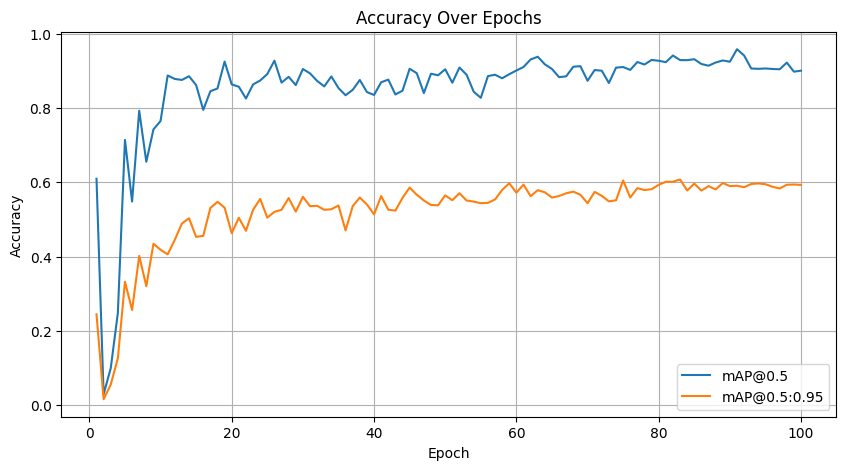

In [22]:
# Find the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key=find_the_number)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()  # Remove any leading/trailing whitespace from column names

# Extract epochs and accuracy metrics
epochs = results.index + 1  # Epochs are zero-indexed, so add 1
mAP_0_5 = results['metrics/mAP50(B)']  # Mean Average Precision at IoU=0.5
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']  # Mean Average Precision at IoU=0.5:0.95

# Plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Save the trained model
model.save('best_license_plate_model.pt')


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# import shutil

# # Path where YOLOv8 saves the trained model
# source_path = "/content/best_license_plate_model.pt"  # Change this if needed

# # Destination path in Google Drive
# destination_path = "/content/drive/MyDrive/PersonalProjects/ANPR/"

# # Copy the file to Google Drive
# shutil.copy(source_path, destination_path)

# print(f"Model saved to {destination_path}")


Model saved to /content/drive/MyDrive/PersonalProjects/ANPR/


In [4]:
# from ultralytics import YOLO

# # Path to your model saved in Google Drive
# model_path = "/content/drive/MyDrive/PersonalProjects/ANPR/best_license_plate_model.pt"

# # Load the YOLOv8 model
# model = YOLO(model_path)

In [5]:
def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars325.png: 192x320 1 license_plate, 71.3ms
Speed: 1.2ms preprocess, 71.3ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 320)


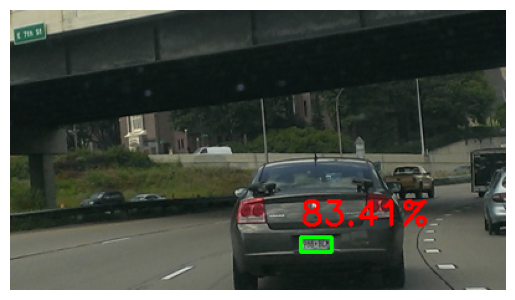

In [22]:
predict_and_plot(test.iloc[0].img_path)


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars96.png: 224x320 1 license_plate, 101.1ms
Speed: 2.0ms preprocess, 101.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 320)


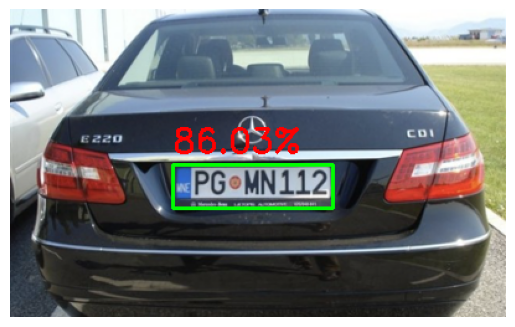

In [42]:
predict_and_plot(test.iloc[25].img_path)

In [24]:
def extract_predictions(image_paths):
    """
    Extracts and returns the regions inside the predicted bounding boxes from a list of test images.

    Parameters:
    image_paths (list): List of paths to the test image files.

    Returns:
    List of cropped images corresponding to the predicted bounding boxes from all images.
    """
    cropped_images = []

    for path_test_car in image_paths:
        # Perform prediction on the test image using the model
        results = model.predict(path_test_car, device='gpu')

        # Load the image using OpenCV
        image = cv2.imread(path_test_car)

        # Extract the bounding boxes and crop the image accordingly
        for result in results:
            for box in result.boxes:
                # Get the coordinates of the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                # Crop the region inside the bounding box
                cropped_img = image[y1:y2, x1:x2]

                # Append the cropped image to the list
                cropped_images.append(cropped_img)

    return cropped_images

In [25]:
detected_plates=extract_predictions(list(test.img_path))


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars325.png: 192x320 1 license_plate, 32.6ms
Speed: 0.7ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars184.png: 192x320 1 license_plate, 28.1ms
Speed: 0.6ms preprocess, 28.1ms inference, 0.7ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars68.png: 224x320 1 license_plate, 41.5ms
Speed: 0.6ms preprocess, 41.5ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 320)

image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars259.png: 192x320 1 license_plate, 29.2ms
Speed: 0.7ms preprocess, 29.2ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 320)

image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detect

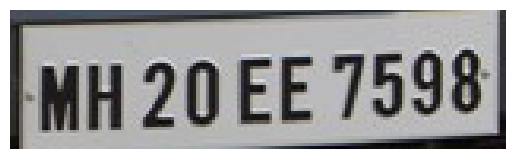

In [26]:
index_to_display = 3 # For example, display the first detected plate

# Display the cropped image
plt.imshow(cv2.cvtColor(detected_plates[index_to_display], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()

In [29]:
# !apt-get update
# !apt-get install tesseract-ocr


In [30]:
# Import the necessary libraries
import pytesseract
from PIL import Image
import cv2

# Set the path for Tesseract in Colab
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Function to apply OCR to detected plates
def apply_ocr_to_detected_plates(detected_plates):
    ocr_results = []

    for plate in detected_plates:
        plate_rgb = cv2.cvtColor(plate, cv2.COLOR_BGR2RGB)  # Convert to RGB
        pil_image = Image.fromarray(plate_rgb)  # Convert to PIL Image

        # Apply OCR
        ocr_text = pytesseract.image_to_string(pil_image, config='--psm 8')
        ocr_results.append(ocr_text.strip())  # Strip extra spaces/newlines

    return ocr_results

# Example: applying OCR to detected plates
ocr_texts = apply_ocr_to_detected_plates(detected_plates)

# Print OCR results
for idx, text in enumerate(ocr_texts):
    print(f"Detected plate {idx + 1}: {text}")


Detected plate 1: ios
Detected plate 2: ee
Detected plate 3: Bas
Detected plate 4: | MH 20 EE 7598
Detected plate 5: cee]
Detected plate 6: DIE
Detected plate 7: Be A 777
Detected plate 8: mAD PTTL
Detected plate 9: [GISG
Detected plate 10: S SHNHAD |
Detected plate 11: ot
Detected plate 12: ce
Detected plate 13: BAB 44 887
Detected plate 14: | 6526 JHD |
Detected plate 15: 'YAMRAJI
Detected plate 16: ABAD:231
Detected plate 17: 9214)
Detected plate 18: i059
Detected plate 19: | MH 20 EE 7598
Detected plate 20: © KLG10A2555
Detected plate 21: rPY56 BXU
Detected plate 22: | SOE
Detected plate 23: 
Detected plate 24: “145 —
Detected plate 25: JHR 26 BC SSI4
Detected plate 26: 1 26°SPF-4)
Detected plate 27: Br 2660
Detected plate 28: hiik@ekpe ey)
Detected plate 29: Kat? 608525
Detected plate 30: =
Detected plate 31: Stee
Detected plate 32: [rn 21 820768 f
Detected plate 33: ieee
Detected plate 34: Fiiall
Detected plate 35: | AATMAN |
Detected plate 36: ian IBY)
Detected plate 37: x
Detec

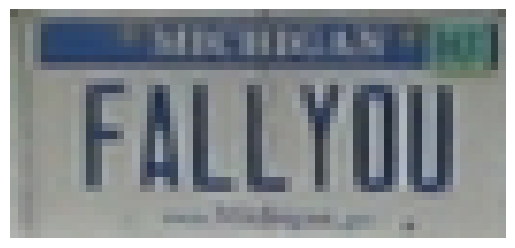

In [37]:
index_to_display = 43 # For example, display the first detected plate

# Display the cropped image
plt.imshow(cv2.cvtColor(detected_plates[index_to_display], cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()